# Guided Project: Predicting Heart Disease

Solution notebook can be referenced [here](https://github.com/dataquestio/solutions/blob/master/Mission740Solutions.ipynb).
## Introduction

The [World Health Organization (WHO)](https://www.who.int/health-topics/cardiovascular-diseases) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future. The dataset has the following features:

1.  `Age`: age of the patient 
[years]   


2.  `Sex`: sex of the patient 
[M: Male, F: Female]


3. `ChestPainType`: chest pain type 
[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]


4. `RestingBP`: resting blood pressure 
[mm Hg]


5. `Cholesterol`: serum cholesterol 
[mm/dl]


6. `FastingBS`: fasting blood sugar 
[1: if FastingBS > 120 mg/dl, 0: otherwise]


7. `RestingECG`: resting electrocardiogram results 
[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]


8. `MaxHR`: maximum heart rate achieved 
[Numeric value between 60 and 202]


9. `ExerciseAngina`: exercise-induced angina 
[Y: Yes, N: No]


10. `Oldpeak`: oldpeak = ST 
[Numeric value measured in depression]


11. `ST_Slope`: the slope of the peak exercise ST segment 
[Up: upsloping, Flat: flat, Down: downsloping]


12. `HeartDisease`: output class 
[1: heart disease, 0: Normal]

In [1]:
## setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load dataset

heart_disease = pd.read_csv('heart_disease_prediction.csv')
heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are 918 observations with no missing values. In total 12 columns, which include 11 feature columns and 1 label column.

##  EDA: Descriptive Statistics

In [4]:
heart_disease.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
heart_disease.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

In [6]:
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Out of the 12 columns:
* Five are categorical encoded in strings, whereas the other seven columns are numerical.
* `FastingBS` and `HeartDisease` only have values of `0` or `1`, so they are both categorical as well.

* What is the average age of the patients?
    - The mean age of the patients was `53.5`.
    
    
* Are there any features that have statistics that don't look right to you or that stand out? Maybe a very high or low value for a given statistic?
    - The values in the `Cholesterol` column showed a high standard deviation relative to the mean value, with an extremely high max of `603`.
    - A min of `0` was found in the `Cholesterol` and `RestingBP` column. In general this should not be physically possible.
    
    
* Are there any missing values?
    - There was no missing value in the dataset.

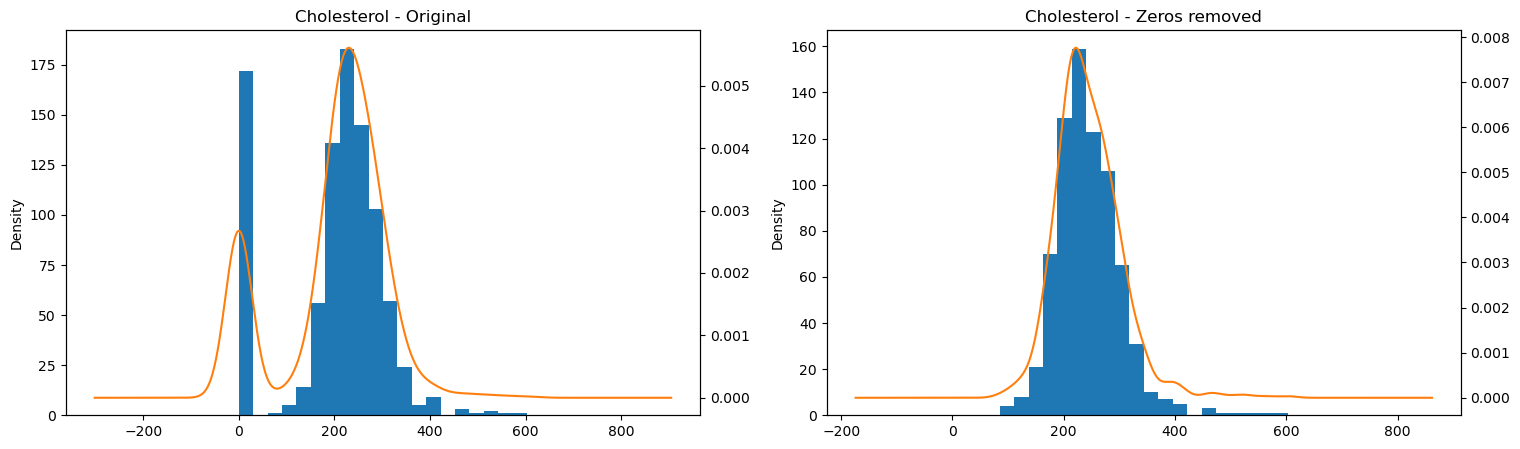

In [7]:
## check the values in Cholesterol column

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)

heart_disease['Cholesterol'].plot.hist(bins = 20)
heart_disease['Cholesterol'].plot.kde(secondary_y = True)
plt.title('Cholesterol - Original')

plt.subplot(1,2,2)
heart_disease.loc[heart_disease.Cholesterol > 0, 'Cholesterol'].plot.hist(bins = 20)
heart_disease.loc[heart_disease.Cholesterol > 0, 'Cholesterol'].plot.kde(secondary_y = True)
plt.title('Cholesterol - Zeros removed')

plt.show()

It appeared that there were many `0` values in the `Cholesterol` column, causing it to show as a bimodel distribution. However, it was quite normally distributed for the positive values.

## EDA: Visualizations

As per the dataset description, `Cholesterol` contains the **serum cholesterol** values. And per the [American Heart Association](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean), serum cholesterol:

*\"is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level.\"*

The above information is enough to let us know that a `0` value for serum cholesterol is unlikely.

1. Calculate the number of missing values in all columns.

In [8]:
# Double check on missing values
heart_disease.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

2. For every categorical column in the dataset, including HeartDisease and FastingBS:

- Create a bar chart that displays the number of rows for each category of that column.
- Add appropriate axis labels, data labels and a title to each plot.
- In a markdown cell, briefly summarize any relevant insight that you gather from the plots. For example, how many patients are male and how many are female?

In [9]:
heart_disease.describe(include = ['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [10]:
heart_disease['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [11]:
heart_disease['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [12]:
categorical_vars = list(heart_disease.dtypes[heart_disease.dtypes == 'object'].index)
categorical_vars += ['FastingBS', 'HeartDisease']
categorical_vars

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS',
 'HeartDisease']

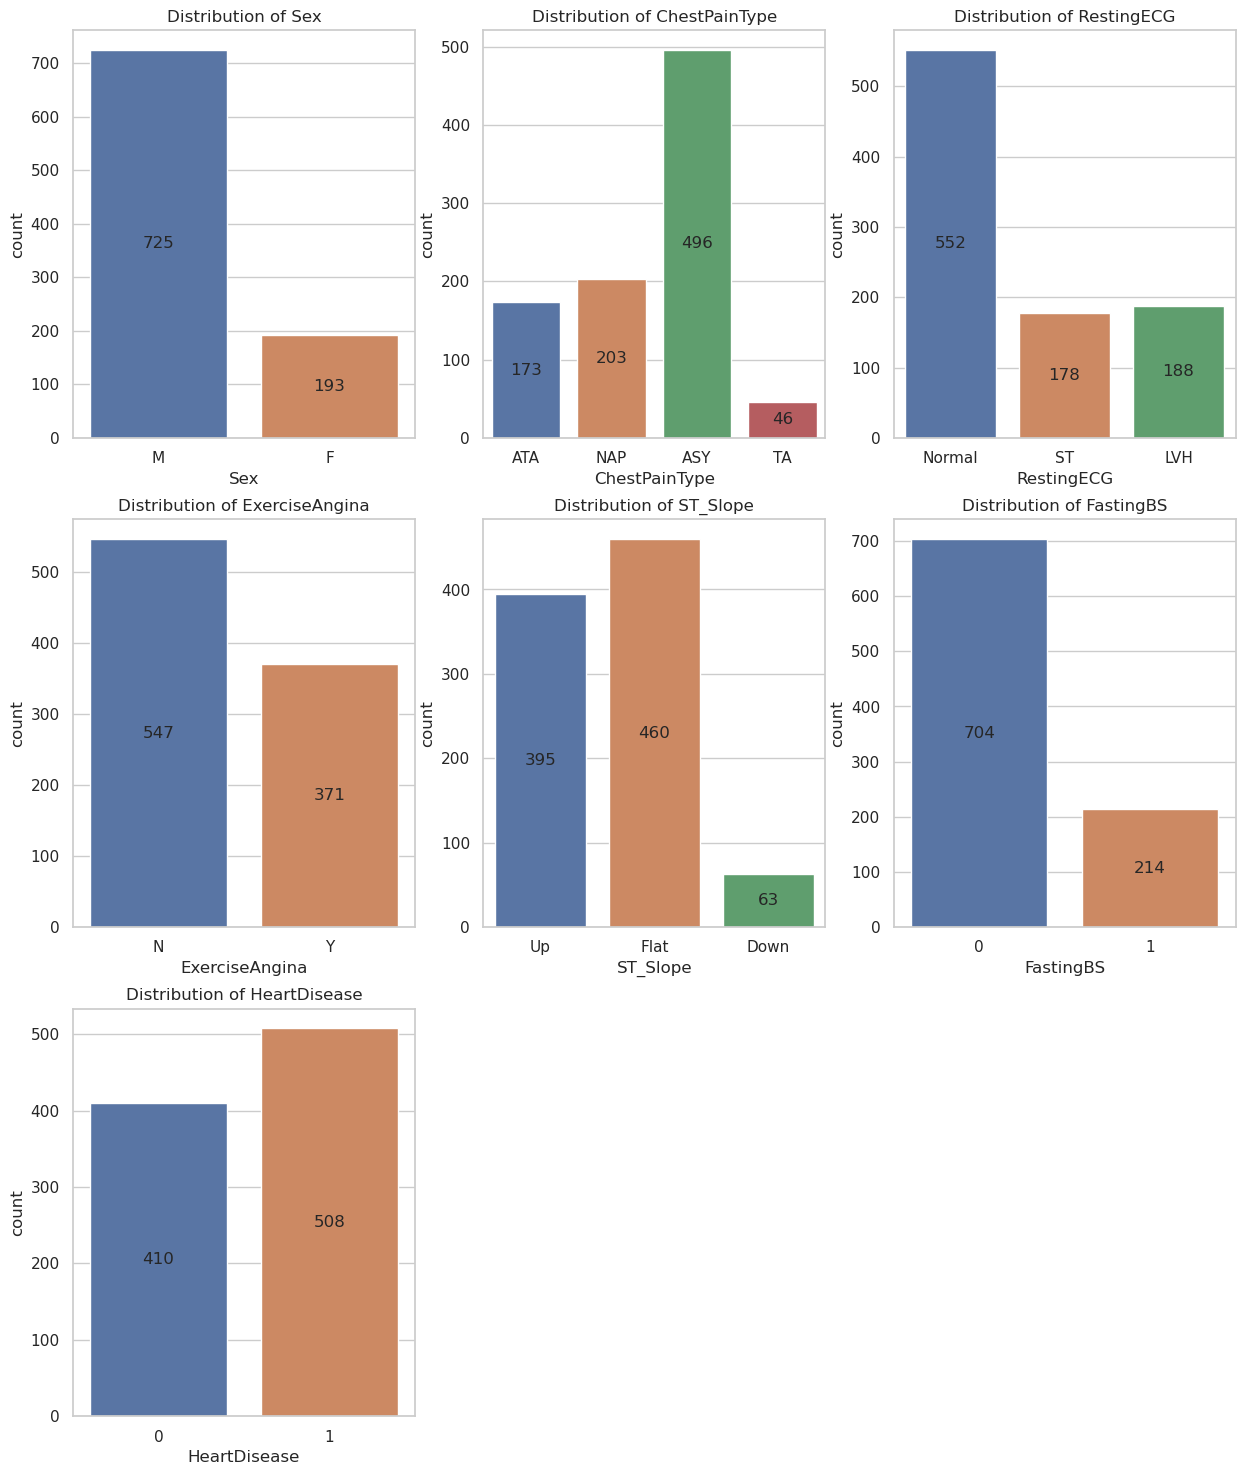

In [13]:
plt.figure(figsize = (15,18))
sns.set_theme(style = "whitegrid")

for i, var in enumerate(categorical_vars):
    
    ax = plt.subplot(3,3,i+1)
    sns.countplot(data = heart_disease, x = var, ax = ax)
    ax.bar_label(ax.containers[0], label_type = 'center')
    plt.title('Distribution of {}'.format(var))

3. For every categorical column in the dataset, including FastingBS:

- Create a bar chart that displays the number of rows for each category of that column, grouped by HeartDisease.
- Add appropriate axis labels, data labels, a title, and a legend to each plot.
- In a markdown cell, briefly summarize any relevant insight that you gather from the plots. For example, which category of ChestPainType has a higher count for patients with heart disease?

In [14]:
categorical_features = categorical_vars[:-1]
categorical_features

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS']

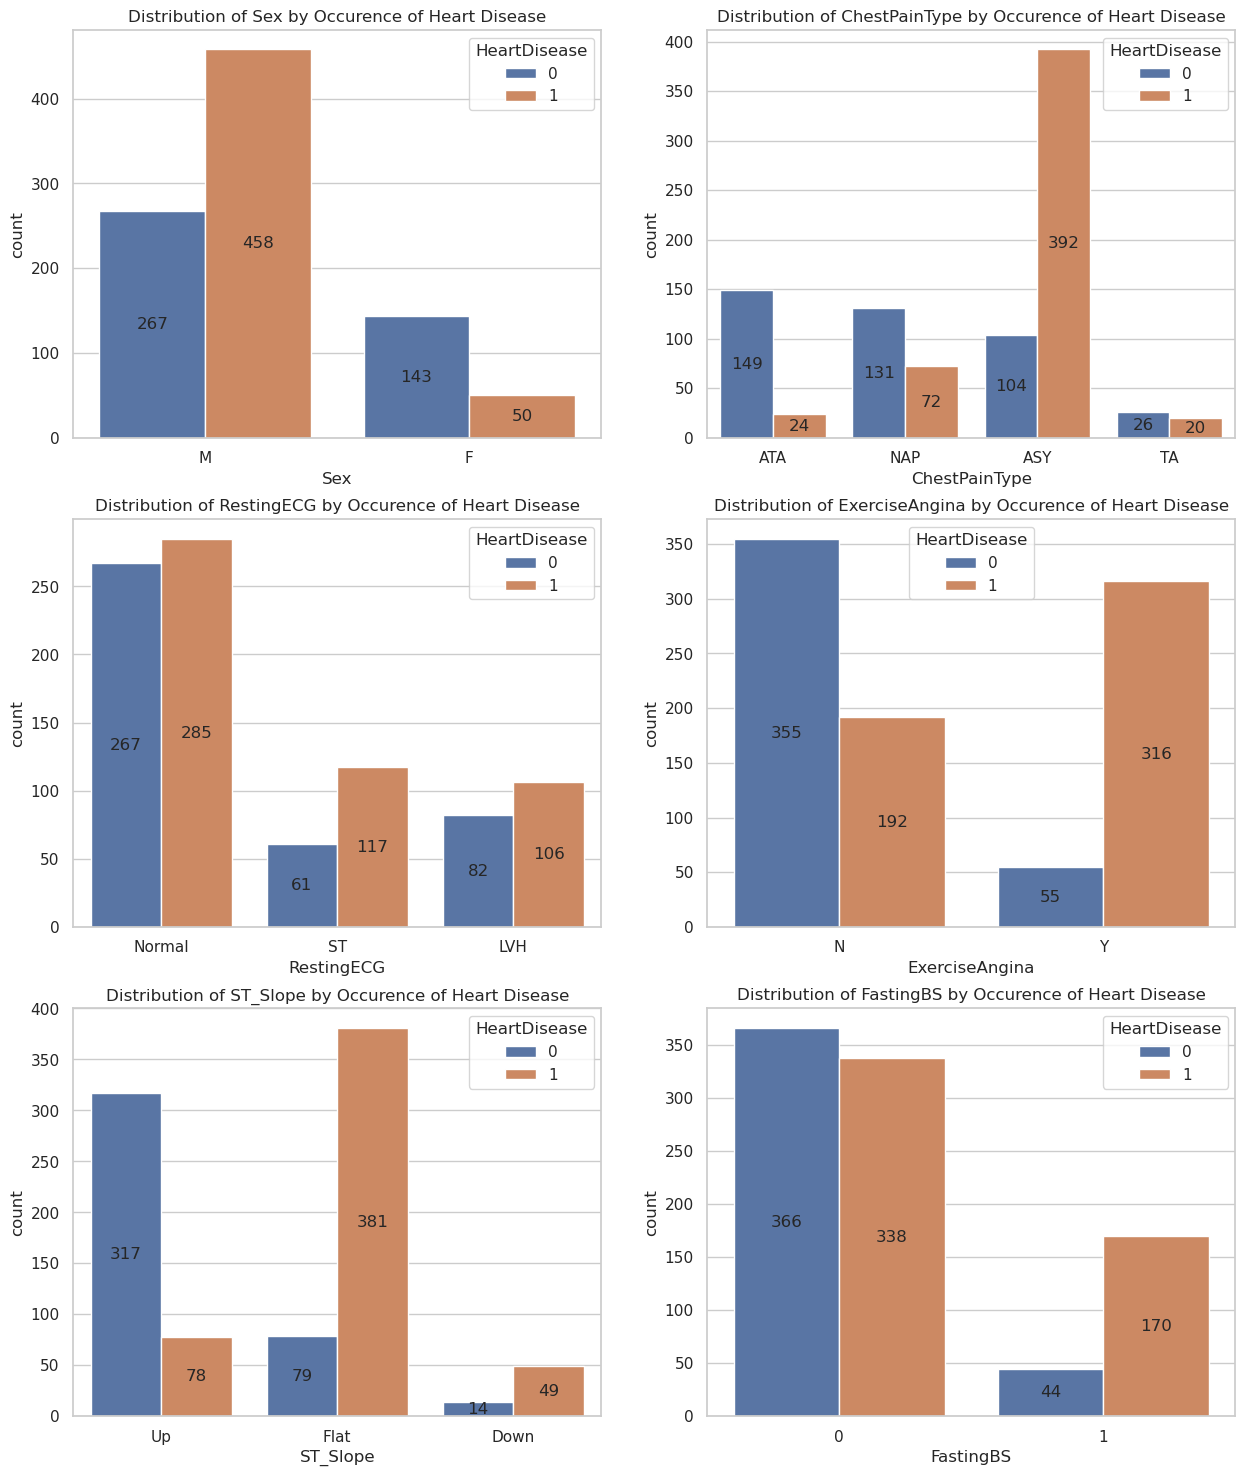

In [15]:
plt.figure(figsize = (15,18))
sns.set_theme(style = "whitegrid")

for i, var in enumerate(categorical_features):
    
    ax = plt.subplot(3,2,i+1)
    sns.countplot(data = heart_disease, x = var, hue = 'HeartDisease', ax = ax)
    
    for container in ax.containers:
        ax.bar_label(container, label_type = 'center')
        
    plt.title('Distribution of {} by Occurence of Heart Disease'.format(var))

There a few observations related to the heart disease:
1. In the dataset male patients were substantially more likely to have a heart disease. 
2. Those with `ASY` (Asymptomatic Chest Pain) were more likely to result in a heart disease more than other chest pain types.
3. Exercise-induced angina might be correlated with heart disease. 
4. A high value of fasting blood sugar (*i.e.*, `FastingBS = 1`) could be indicative of a heart disease.

4. [Optional] Explore any groupings and/or visualizations of the data as you see fit. For example:

- What percentage of patients with heart disease are male and over 50 years old?
- What is the median age of patients who were diagnosed with heart disease?

In [16]:
heart_disease_yes = heart_disease[heart_disease.HeartDisease == 1]
male_over_50 = heart_disease_yes[(heart_disease_yes.Age > 50) & (heart_disease_yes.Sex == 'M')]

print('Patients with heart disease that were male and over 50 years old were about {:.2%}.'.format(
    male_over_50.shape[0]/heart_disease_yes.shape[0]))

Patients with heart disease that were male and over 50 years old were about 67.72%.


In [17]:
print('The median age of patients who were diagnosed with heart disease was {:.0f}.'.format(
heart_disease_yes.Age.median()))

The median age of patients who were diagnosed with heart disease was 57.


## Data Cleaning

- The dataset is highly skewed towards male patients. `725` rows correspond to male patients, whereas only `193` correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.
- `410` patients were not diagnosed with heart disease, whereas `508` patients were. The target variable is somewhat evenly distributed, which is beneficial for training our model.
- A significant number of patients, `392`, diagnosed with heart disease have asymptomatic (`ASY`) chest pain. While chest pain could be a relevant feature for our model, it's should be noted that asymptomatic implies that those patients who had heart disease did not have chest pain as a symptom.
- A high number (`170`) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not.

In [18]:
(heart_disease['RestingBP'] == 0).sum()

1

In [19]:
(heart_disease['Cholesterol'] == 0).sum()

172

So based on the above analysis:
- The `RestingBP` column only had one row with a value of `0`, it should be reasonable to remove it.
- The `Cholesterol` column had `172` rows with a value of `0`, which could be too large to discard. We will replace those values with the median value of the corresponding column and the corresponding `HeartDisease` value.

In [20]:
heart_disease_clean = heart_disease[heart_disease.RestingBP > 0].copy()
heart_disease_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.1+ KB


In [21]:
# Get cholesterol medians grouped by HeartDisease value
cholesterol_medians = heart_disease_clean.groupby('HeartDisease')['Cholesterol'].median()
cholesterol_medians

HeartDisease
0    227.0
1    217.0
Name: Cholesterol, dtype: float64

In [22]:
# impute zeros by median
heart_disease_clean['Cholesterol'] = heart_disease_clean.apply(
    lambda x: cholesterol_medians[x['HeartDisease']] if x['Cholesterol'] == 0 else x['Cholesterol'], 
    axis = 1)

heart_disease_clean['Cholesterol'].value_counts()

217.0    155
227.0     24
254.0     11
220.0     10
223.0     10
        ... 
347.0      1
365.0      1
412.0      1
491.0      1
131.0      1
Name: Cholesterol, Length: 221, dtype: int64

In [23]:
heart_disease_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


## Feature Selection

Now that we've cleaned our data, we can select features for our model. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

* `Age`
* `Sex`
* `ChestPainType`
* `Cholesterol`
* `FastingBS`

1. Convert the categorical features into dummy variables.
2. Create a Pearson's correlation heat map.
    * You can use Seaborn's heat map() function to plot the heat map.
3. Identify from the heat map which features are reasonably correlated to HeartDisease.
4. Select features using the square of the Pearson correlation coefficient instead. Do you think that would be a better approach?

In [24]:
# Create dummies for all categorical vars 

heart_disease_clean = pd.get_dummies(heart_disease_clean, drop_first = True)
heart_disease_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [25]:
# Create heatmap for Pearson's correlation coeff

heart_disease_corrs = heart_disease_clean.corr()
heart_disease_corrs

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.263084,0.026756,0.198170,-0.382280,0.258563,0.282012,0.055670,-0.218113,-0.011681,0.032083,-0.230793,0.136903,0.216017,0.185499,-0.258027
RestingBP,0.263084,1.000000,0.092169,0.067823,-0.109693,0.174252,0.117990,0.009427,-0.051374,-0.027536,0.049464,-0.113759,0.089156,0.153064,0.110171,-0.105969
Cholesterol,0.026756,0.092169,1.000000,-0.023912,0.037959,0.057086,0.024914,-0.132268,0.020929,-0.053205,-0.038277,-0.046147,-0.049264,0.058131,0.067999,-0.055602
FastingBS,0.198170,0.067823,-0.023912,1.000000,-0.131067,0.053062,0.267994,0.120424,-0.140844,-0.038201,0.026752,-0.092588,0.126853,0.059988,0.107683,-0.162346
MaxHR,-0.382280,-0.109693,0.037959,-0.131067,1.000000,-0.161213,-0.401410,-0.189668,0.254214,0.133411,0.100235,0.023181,-0.157561,-0.370023,-0.343641,0.384339
Oldpeak,0.258563,0.174252,0.057086,0.053062,-0.161213,1.000000,0.403638,0.105444,-0.261903,-0.107615,0.032382,-0.117293,0.056283,0.409494,0.282874,-0.450299
HeartDisease,0.282012,0.117990,0.024914,0.267994,-0.401410,0.403638,1.000000,0.305118,-0.401680,-0.215311,-0.054591,-0.092452,0.103067,0.495490,0.553700,-0.621843
Sex_M,0.055670,0.009427,-0.132268,0.120424,-0.189668,0.105444,0.305118,1.000000,-0.161294,-0.067682,-0.003903,-0.011098,0.064009,0.191226,0.115596,-0.150537
ChestPainType_ATA,-0.218113,-0.051374,0.020929,-0.140844,0.254214,-0.261903,-0.401680,-0.161294,1.000000,-0.256306,-0.110817,0.108422,-0.046381,-0.300947,-0.304346,0.357324
ChestPainType_NAP,-0.011681,-0.027536,-0.053205,-0.038201,0.133411,-0.107615,-0.215311,-0.067682,-0.256306,1.000000,-0.122150,0.003352,-0.041317,-0.164722,-0.074256,0.095585


<AxesSubplot:>

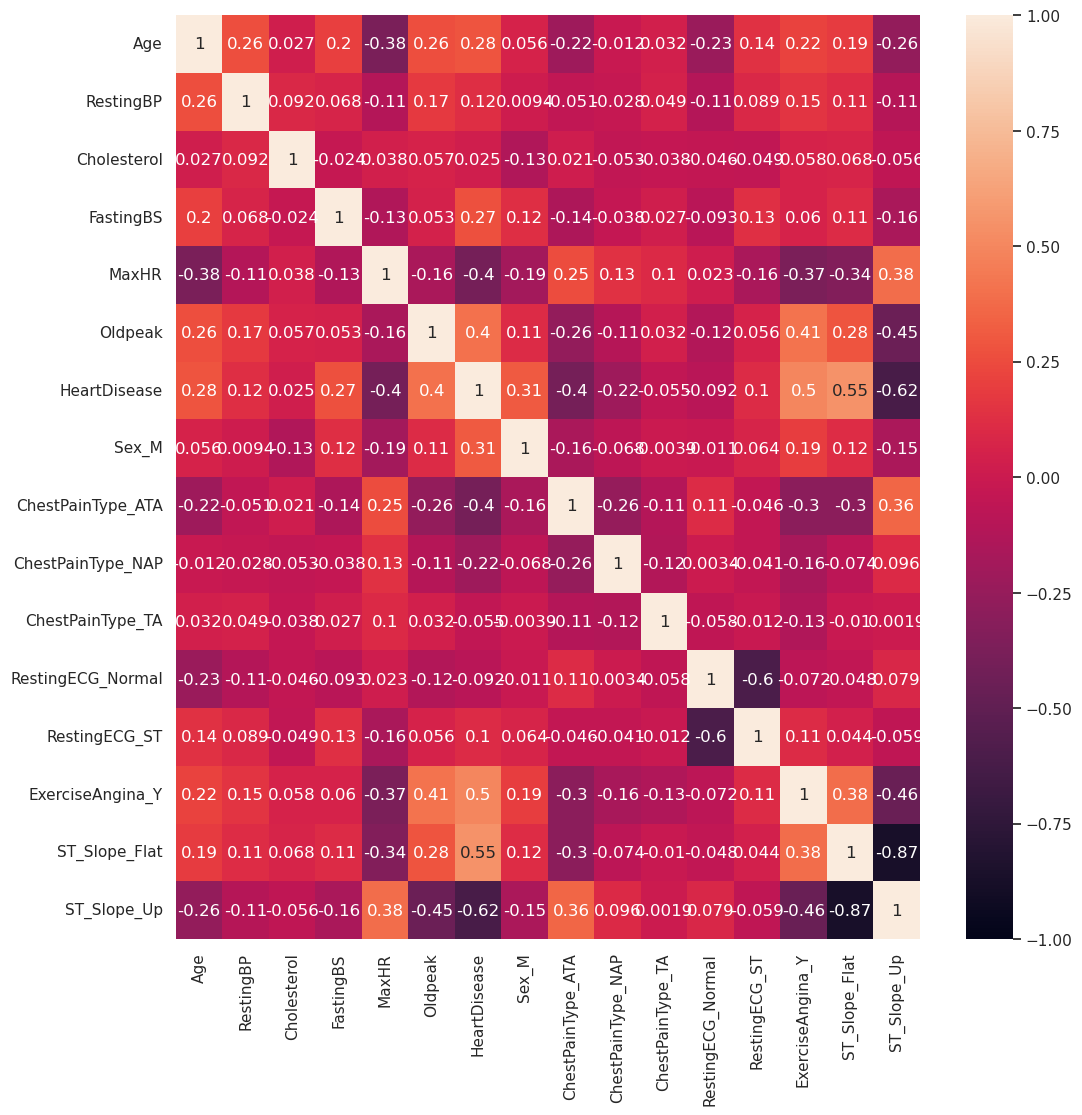

In [26]:
plt.figure(figsize = (12,12))
sns.heatmap(heart_disease_corrs, vmin = -1, vmax = 1, annot = True)

<AxesSubplot:>

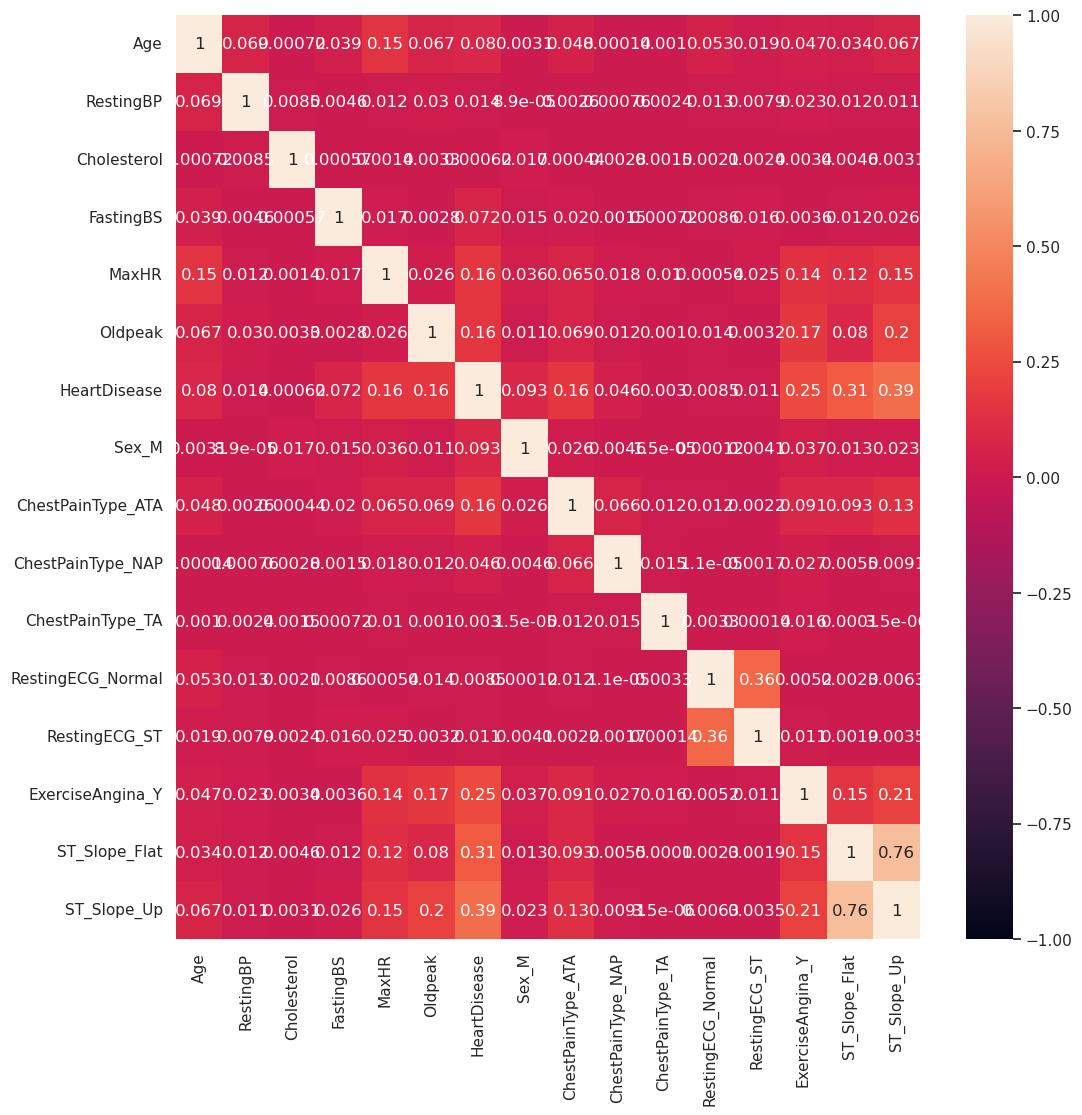

In [27]:
# Using squared corr to just look into strength of correlation instead of directions

plt.figure(figsize = (12,12))
sns.heatmap(np.square(heart_disease_corrs), vmin = -1, vmax = 1, annot = True)

In [28]:
# Abs values of the corrs with HeartDisease 
heart_disease_corrs['HeartDisease'].abs().sort_values(ascending = False)[1:]

ST_Slope_Up          0.621843
ST_Slope_Flat        0.553700
ExerciseAngina_Y     0.495490
Oldpeak              0.403638
ChestPainType_ATA    0.401680
MaxHR                0.401410
Sex_M                0.305118
Age                  0.282012
FastingBS            0.267994
ChestPainType_NAP    0.215311
RestingBP            0.117990
RestingECG_ST        0.103067
RestingECG_Normal    0.092452
ChestPainType_TA     0.054591
Cholesterol          0.024914
Name: HeartDisease, dtype: float64

In [29]:
# Choosing features with corr value > 0.3
corr_threshhold = 0.30 ## Arbitrary!

heart_disease_corrs_abs = heart_disease_corrs['HeartDisease'].abs().sort_values(ascending = False)[1:]
selected_features = list(heart_disease_corrs_abs[heart_disease_corrs_abs > corr_threshhold].index)
selected_features

['ST_Slope_Up',
 'ST_Slope_Flat',
 'ExerciseAngina_Y',
 'Oldpeak',
 'ChestPainType_ATA',
 'MaxHR',
 'Sex_M']

## Building a Classifier - Single Feature

1. Split the dataset into training and validation sets.
    * Select a suitable split percentage.
    * Set random_state to a number of your choice to ensure reproducibility.
2. Create a list that contains your selected features as strings.
3. Iterate over the list. For every iteration:
    * Create a k-NN classifier.
    * Set a value for the number of neighbors.
    * Fit the model to the training data one feature at a time.
    * Evaluate the model on the validation set.
4. Print the accuracy of the model.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [31]:
X = heart_disease_clean.drop('HeartDisease', axis = 1)
y = heart_disease_clean['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [32]:
## Fit a KNN clf for each single feature

k = 5 # Arbitrary

for feature in selected_features:
    
    X_train_single_feature = X_train[feature].to_numpy().reshape(-1, 1) ## Need 2d array even for single feature!
    X_val_single_feature = X_val[feature].to_numpy().reshape(-1, 1)
    
#     X_train_single_feature = X_train[[feature]]  ## Returns dataframe even for a single col
#     X_val_single_feature = X_val[[feature]]
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_single_feature, y_train)
    
    print('For a KNN based on {} nearest neighbors, the accuracy using {} as feature is {:.2%}.'.format(
        k, feature, knn.score(X_val_single_feature, y_val)))

For a KNN based on 5 nearest neighbors, the accuracy using ST_Slope_Up as feature is 54.35%.
For a KNN based on 5 nearest neighbors, the accuracy using ST_Slope_Flat as feature is 84.24%.
For a KNN based on 5 nearest neighbors, the accuracy using ExerciseAngina_Y as feature is 75.00%.
For a KNN based on 5 nearest neighbors, the accuracy using Oldpeak as feature is 73.91%.
For a KNN based on 5 nearest neighbors, the accuracy using ChestPainType_ATA as feature is 67.93%.
For a KNN based on 5 nearest neighbors, the accuracy using MaxHR as feature is 61.41%.
For a KNN based on 5 nearest neighbors, the accuracy using Sex_M as feature is 54.35%.


## Building a Classifier - Multiple Features

***Before we do, it's important to note that our features are not yet normalized. Not all of the values are within the same range. We will first scale our data to the range (0, 1) before training our model. Note: We will only scale our selected features.***

1. Using MinMaxScaler, scale the selected features to the range (0, 1).
    * 1.1. Create the scaler.
    * 1.2. Fit and transform the features in the training set using the scaler and save the output.
    * 1.3. Transform the features in the validation set.
2. Create a k-NN model.
3. Fit the model to the training data on the scaled features.
4. Evaluate the model on the scaled features in the validation set.
5. Calculate and print the accuracy of the model.

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

X_train_multiple_features = X_train[selected_features]
X_train_scaled = scaler.fit_transform(X_train_multiple_features)

X_val_multiple_features = X_val[selected_features]
X_val_scaled = scaler.transform(X_val_multiple_features)

In [35]:
k = 5

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train_scaled, y_train)

print('For a KNN based on {} nearest neighbors, the accuracy using {} as features is {:.2%}.'.format(
        k, selected_features, knn.score(X_val_scaled, y_val)))

For a KNN based on 5 nearest neighbors, the accuracy using ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak', 'ChestPainType_ATA', 'MaxHR', 'Sex_M'] as features is 85.33%.


## Hyperparameter Tuning

`GridSearchCV`, as we know, allows us to search over all the parameters for our classifier in scikit-learn. For example, for the `KNeighborsClassifie`r we can choose to experiment with the following:

`n_neighbors`,
`weights`,
`metric` and more.
Additionally, since `GridSearchCV` creates a validation set as part of its process, we'll have to update our workflow a bit.

1. Split the dataset into training and test sets.
    * Select a split percentage that you think is suitable for this dataset.
    * Set random_state to a number of your choice to ensure reproducibility.
2. Scale the training set.
3. Create a dictionary that stores the parameters and values you want to search over as key-value pairs.
4. Instantiate a k-NN model.
5. Create a GridSearchCV instance using the above model and the dictionary.
    * Make sure to set scoring to accuracy.
6. Fit the above instance on the scaled features and corresponding labels.
7. Print out the best score and the best parameters obtained from the grid search.
    * Refer to the attributes listed in the documentation in order to print these values.

In [36]:
X = heart_disease_clean.drop('HeartDisease', axis = 1)
y = heart_disease_clean['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [37]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

In [38]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': list(range(1,11,1)),
    'weights': ['uniform','distance'],
    'metric': ['minkowski', 'manhattan'],
    'p':[1,2,3]
}

In [39]:
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [40]:
best_estimator = knn_grid_search.best_estimator_
best_score = knn_grid_search.best_score_
best_params = knn_grid_search.best_params_

print('The best estimator had a accuracy score of {:.2%}, based on the following parameters :{}.'.format(
best_score, best_params))

The best estimator had a accuracy score of 83.36%, based on the following parameters :{'metric': 'minkowski', 'n_neighbors': 9, 'p': 3, 'weights': 'uniform'}.


<AxesSubplot:>

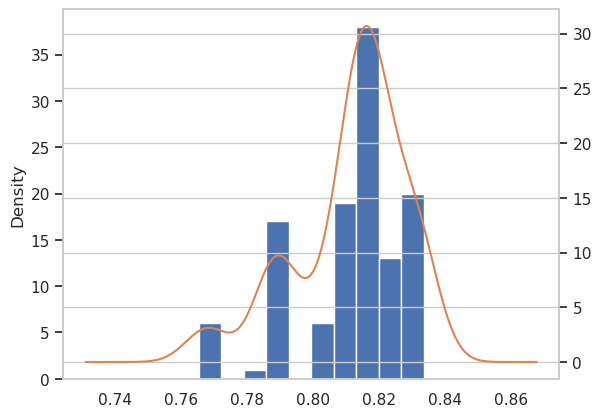

In [46]:
%matplotlib inline
scores = pd.Series(knn_grid_search.cv_results_['mean_test_score'])
scores.plot.hist()
scores.plot.kde(secondary_y = True)

## Model Evaluation on Test Set

1. Scale the same features from the test set.
2. Predict the model's output on the scaled features from the test set using the best estimate.
3. Calculate and print the accuracy of the model's prediction.

In [41]:
print('The best estimator resulted in an accuracy of {:.2%} on the test set.'.format(
    best_estimator.score(X_test_scaled, y_test)))

The best estimator resulted in an accuracy of 85.33% on the test set.
